In [24]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "layoffs.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "swaptr/layoffs-2022",
  file_path,
)

C:\Users\user\AppData\Local\Temp\ipykernel_26368\3746379681.py:8: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


In [26]:
df.head()

,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised,country,date_added
0,GroundGame Health,Tampa Bay,97.0,5/15/2025,NaN,Healthcare,https://www.bizjournals.com/tampabay/news/2025...,Series A,$17,United States,5/16/2025
1,Noogata,"Tel Aviv,Non-U.S.",10.0,5/15/2025,100%,AI,https://www.calcalistech.com/ctechnews/article...,Series A,$28,Israel,5/16/2025
2,Amazon,Seattle,100.0,5/14/2025,NaN,Retail,https://www.cnbc.com/2025/05/14/amazon-lays-of...,Post-IPO,$8100,United States,5/16/2025
3,Microsoft,Seattle,6000.0,5/13/2025,3%,Other,https://www.cnbc.com/2025/05/13/microsoft-is-c...,Post-IPO,$1,United States,5/13/2025
4,Chegg,SF Bay Area,248.0,5/12/2025,22%,Education,https://www.reuters.com/world/americas/chegg-l...,Post-IPO,$227,United States,5/12/2025


In [27]:
df.shape

(4067, 11)

In [28]:
df.describe()

,total_laid_off
count,2654.000000
mean,278.994725
std,962.950121
min,3.000000
25%,40.000000
50%,85.000000
75%,200.000000
max,22000.000000


In [29]:
df.isnull().sum()

company                   0
location                  1
total_laid_off         1413
date                      0
percentage_laid_off    1480
industry                  1
source                    3
stage                     7
funds_raised            447
country                   0
date_added                0
dtype: int64

In [30]:
df.dropna(subset=['location', 'total_laid_off', 'industry', 'stage', 'source'], inplace=True)

In [31]:
df.isnull().sum()

company                  0
location                 0
total_laid_off           0
date                     0
percentage_laid_off    812
industry                 0
source                   0
stage                    0
funds_raised           256
country                  0
date_added               0
dtype: int64

In [32]:
df.duplicated().sum()

0

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

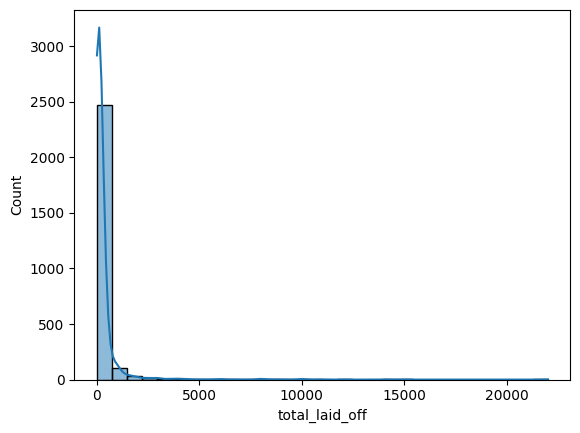

In [34]:
sns.histplot(data=df, x='total_laid_off', bins=30, kde=True)
plt.show()

In [35]:
df.shape

(2650, 11)

In [ ]:
count = (df['total_laid_off'] < 1000).sum()
print(count)
#ok fine (note: dicoba jadi variable thresholdnya)

2648


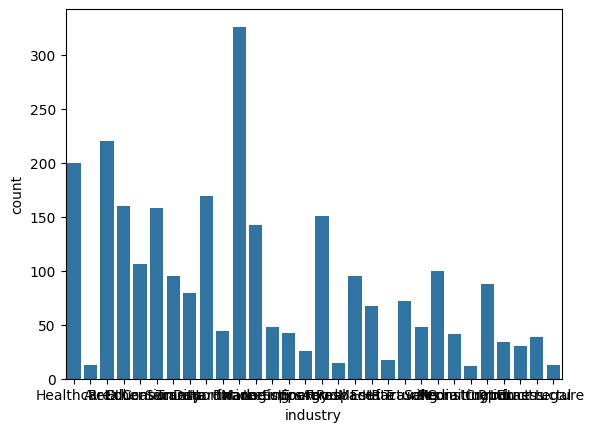

In [37]:
sns.countplot(data=df, x='industry')
plt.show()

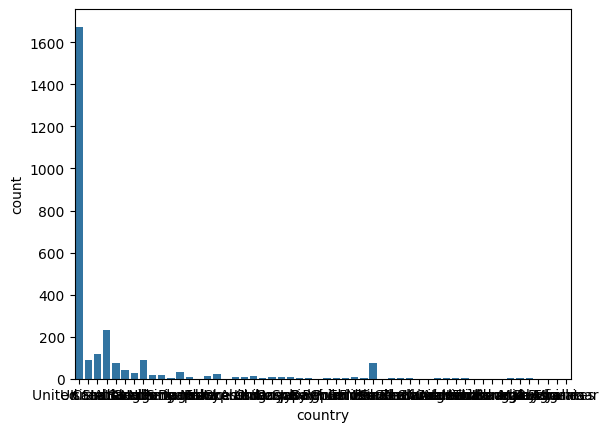

In [38]:
sns.countplot(data=df, x='country')
plt.show()

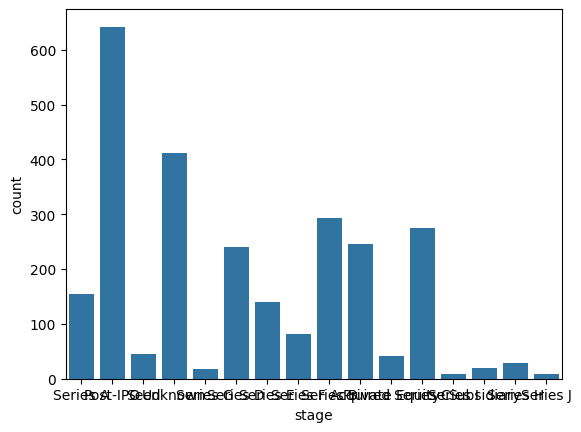

In [42]:
sns.countplot(data=df, x='stage')
plt.show()

In [45]:
df.sort_values(by='total_laid_off', ascending=False).head(15)

,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised,country,date_added
23,Intel,Sacramento,22000.0,4/23/2025,20%,Hardware,https://www.bloomberg.com/news/articles/2025-0...,Post-IPO,$12,United States,4/23/2025
334,Intel,SF Bay Area,15000.0,8/1/2024,15%,Hardware,https://www.intel.com/content/www/us/en/newsro...,Post-IPO,$12,United States,8/1/2024
500,Tesla,Austin,14000.0,4/15/2024,10%,Transportation,https://www.nytimes.com/2024/04/15/business/te...,Post-IPO,$20200,United States,4/15/2024
1968,Google,SF Bay Area,12000.0,1/20/2023,6%,Consumer,https://www.nytimes.com/2023/01/20/business/go...,Post-IPO,$26,United States,1/20/2023
2452,Meta,SF Bay Area,11000.0,11/9/2022,13%,Consumer,https://www.cnbc.com/2022/11/09/meta-to-lay-of...,Post-IPO,$26000,United States,11/9/2022
2001,Microsoft,Seattle,10000.0,1/18/2023,5%,Other,https://www.usatoday.com/story/money/2023/01/1...,Post-IPO,$1,United States,1/18/2023
2384,Amazon,Seattle,10000.0,11/16/2022,3%,Retail,https://www.nytimes.com/2022/11/14/technology/...,Post-IPO,$108,United States,11/16/2022
1643,Meta,SF Bay Area,10000.0,3/14/2023,NaN,Consumer,https://about.fb.com/news/2023/03/mark-zuckerb...,Post-IPO,$26000,United States,3/14/2023
1626,Amazon,Seattle,9000.0,3/20/2023,NaN,Retail,https://www.cnbc.com/2023/03/20/amazon-layoffs...,Post-IPO,$108,United States,3/20/2023
1713,Ericsson,"Stockholm,Non-U.S.",8500.0,2/24/2023,8%,Other,https://www.reuters.com/business/media-telecom...,Post-IPO,$663,Sweden,2/24/2023
